<a href="https://colab.research.google.com/github/matheusapostulo/diabetes-machine-learning/blob/main/Diabetes_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# DIABETES DATASET

## Data Exploration

In [ ]:
diabetes_dataset = pd.read_csv('diabetes3_imbalance.csv')

In [ ]:
len(diabetes_dataset)
# Showing the dataset 

253680

In [ ]:
diabetes_dataset.describe()
# Dataset description

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [ ]:
diabetes_dataset.tail()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[5 rows x 22 columns]

In [ ]:
## Checking duplicate rows
diabetes_dataset.duplicated()
diabetes_dataset.duplicated().sum()

23899

In [ ]:
## Checkin non-duplicate rows
(~diabetes_dataset.duplicated()).sum()

229781

## Triyng to find outliers 

In [170]:
# Function for find outliers at the dataframe. This function shows and returns.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   if len(outliers) > 0:
      print(f'{df.name} have {len(outliers)} possibles outlier! Max_valor = {outliers.max()} | Min_valor = {outliers.min()}')
      return df.name   

In [172]:
# Testing "find_outliers_IQR" in all dataset columns
# Defining a list for all columns
all_columns = diabetes_dataset.iloc[:, 1:22]

# Defining a list for all columns that've outliers
all_columns_outliers = []
# Calling the function with all columns
for i in all_columns:
 outlier = find_outliers_IQR(diabetes_dataset[i])
 if outlier != None:
  all_columns_outliers.append(outlier)
 
all_columns_outliers

CholCheck have 9470 possibles outlier! Max_valor = 0.0 | Min_valor = 0.0
BMI have 9847 possibles outlier! Max_valor = 98.0 | Min_valor = 12.0
Stroke have 10292 possibles outlier! Max_valor = 1.0 | Min_valor = 1.0
HeartDiseaseorAttack have 23893 possibles outlier! Max_valor = 1.0 | Min_valor = 1.0
PhysActivity have 61760 possibles outlier! Max_valor = 0.0 | Min_valor = 0.0
Veggies have 47839 possibles outlier! Max_valor = 0.0 | Min_valor = 0.0
HvyAlcoholConsump have 14256 possibles outlier! Max_valor = 1.0 | Min_valor = 1.0
AnyHealthcare have 12417 possibles outlier! Max_valor = 0.0 | Min_valor = 0.0
NoDocbcCost have 21354 possibles outlier! Max_valor = 1.0 | Min_valor = 1.0
GenHlth have 12081 possibles outlier! Max_valor = 5.0 | Min_valor = 5.0
MentHlth have 36208 possibles outlier! Max_valor = 30.0 | Min_valor = 6.0
PhysHlth have 40949 possibles outlier! Max_valor = 30.0 | Min_valor = 8.0
DiffWalk have 42675 possibles outlier! Max_valor = 1.0 | Min_valor = 1.0


['CholCheck',
 'BMI',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk']

## Data Visualization 

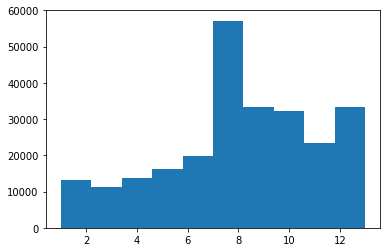

In [ ]:
plt.hist(x = diabetes_dataset['Age']);

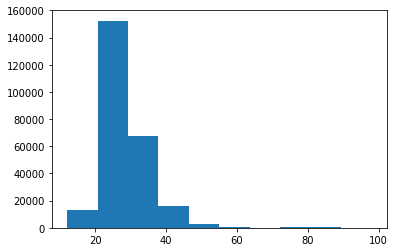

In [ ]:
plt.hist(x = diabetes_dataset['BMI']);

In [173]:
# Showing the outliers in graph form
teste = ['BMI', 'Age']

for i in range(len(teste)):
  fig_bmi = px.box(diabetes_dataset, y=teste[i])
  fig_bmi.show()

In [174]:

grafic = px.scatter_matrix(diabetes_dataset, dimensions= ['BMI'], color='Diabetes_012')
grafic.show()

In [ ]:
diabetes_dataset.loc[diabetes_dataset['BMI']>=92]

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
19816            2.0     1.0       1.0        1.0  92.0     0.0     0.0   
36324            1.0     1.0       0.0        1.0  96.0     0.0     0.0   
76317            0.0     1.0       0.0        1.0  92.0     0.0     0.0   
76353            0.0     0.0       1.0        1.0  95.0     1.0     0.0   
76362            2.0     0.0       1.0        1.0  92.0     1.0     0.0   
76366            0.0     0.0       1.0        0.0  95.0     1.0     0.0   
76370            0.0     0.0       1.0        0.0  98.0     1.0     0.0   
76371            0.0     1.0       1.0        1.0  95.0     1.0     0.0   
76373            0.0     0.0       1.0        1.0  95.0     1.0     0.0   
76394            2.0     1.0       1.0        1.0  98.0     1.0     0.0   
76396            2.0     1.0       1.0        1.0  98.0     1.0     1.0   
76410            0.0     1.0       1.0        1.0  92.0     1.0     0.0   
76431            2.0     0.0       1.0        1.0  92.0     0.0     0.0   
76447            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
76454            2.0     1.0       1.0        1.0  92.0     1.0     0.0   
76466            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
76468            0.0     0.0       1.0        1.0  92.0     0.0     0.0   
76472            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
76474            0.0     0.0       1.0        1.0  92.0     0.0     0.0   
76500            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
76527            0.0     0.0       1.0        1.0  95.0     1.0     0.0   
76532            0.0     1.0       1.0        1.0  98.0     0.0     1.0   
76554            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
79338            0.0     0.0       1.0        1.0  92.0     0.0     0.0   
79349            0.0     1.0       1.0        1.0  92.0     1.0     0.0   
79350            0.0     0.0       0.0        1.0  95.0     1.0     0.0   
79359            0.0     0.0       1.0        1.0  92.0     1.0     0.0   
79373            0.0     1.0       0.0        1.0  92.0     0.0     0.0   
79378            0.0     1.0       0.0        1.0  92.0     0.0     0.0   
79386            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79392            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79401            0.0     1.0       0.0        1.0  92.0     0.0     1.0   
79403            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
79417            2.0     0.0       0.0        1.0  92.0     0.0     0.0   
79418            0.0     0.0       1.0        1.0  95.0     0.0     0.0   
79419            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79437            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79442            0.0     1.0       1.0        1.0  92.0     0.0     0.0   
79444            0.0     1.0       0.0        1.0  92.0     1.0     0.0   
79447            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79478            0.0     1.0       1.0        1.0  98.0     0.0     0.0   
79492            2.0     1.0       1.0        1.0  95.0     1.0     0.0   
79495            0.0     0.0       0.0        1.0  92.0     1.0     0.0   
79497            0.0     0.0       0.0        1.0  92.0     0.0     0.0   
79507            2.0     0.0       0.0        1.0  98.0     0.0     0.0   
79522            0.0     1.0       0.0        1.0  95.0     0.0     0.0   
79535            0.0     1.0       1.0        1.0  92.0     1.0     0.0   
79544            0.0     0.0       1.0        1.0  95.0     0.0     0.0   
79554            0.0     0.0       1.0        1.0  98.0     1.0     0.0   
123483           0.0     0.0       1.0        1.0  92.0     0.0     0.0   
206389           0.0     1.0       1.0        1.0  95.0     0.0     0.0   
244309           0.0     1.0       1.0        1.0  95.0     0.0     0.0   

        HeartDiseaseorAttack  Ph

In [ ]:
diabetes_dataset['BMI'][diabetes_dataset['BMI']>=92].count()

52

## Missing values analysis

In [ ]:
diabetes_dataset.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64